# Imports Awlays First

In [80]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import ne_chunk
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

## Downloading Required Files
There are two options:

Manual:
- Just in case there is no access to the internet in an isolated virtual environment, we can download the zip files by going to: http://www.nltk.org/nltk_data/.

These are the files:
- Stopwords Corpus
- Averaged Perceptron Tagger
- ACE Named Entity Chunker (Maximum entropy)
- Word Lists
- WordNet

NLTK Download:
- Use the nltk.downlad() method to get it.

The files will exist in this path:
**C:\Users\{user_name}\AppData\Roaming\nltk_data**


In [44]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Text to Tokenize and Remove Stopwords Example

In [60]:
text = "Wikipedia is a multilingual online encyclopedia with exclusively free content and no ads, based on open collaboration through a model of content editing using web-based applications such as web browsers, called wiki. It is the largest and most popular general reference work on the World Wide Web, and is one of the most popular websites by Alexa rank as of April 2019. It is owned and supported by the Wikimedia Foundation, a non-profit organization that operates on money it receives from donors to remain ad free."
print(text)

Wikipedia is a multilingual online encyclopedia with exclusively free content and no ads, based on open collaboration through a model of content editing using web-based applications such as web browsers, called wiki. It is the largest and most popular general reference work on the World Wide Web, and is one of the most popular websites by Alexa rank as of April 2019. It is owned and supported by the Wikimedia Foundation, a non-profit organization that operates on money it receives from donors to remain ad free.


# NLTK stopwords Process

## Normalize Text
Remove any unwanted characters out of the text. Re has special sequences that identify specific characters.
- Visint the documentation to know more about them: https://docs.python.org/2/library/re.html
- Visit https://www.w3schools.com/python/python_regex.asp to practice.
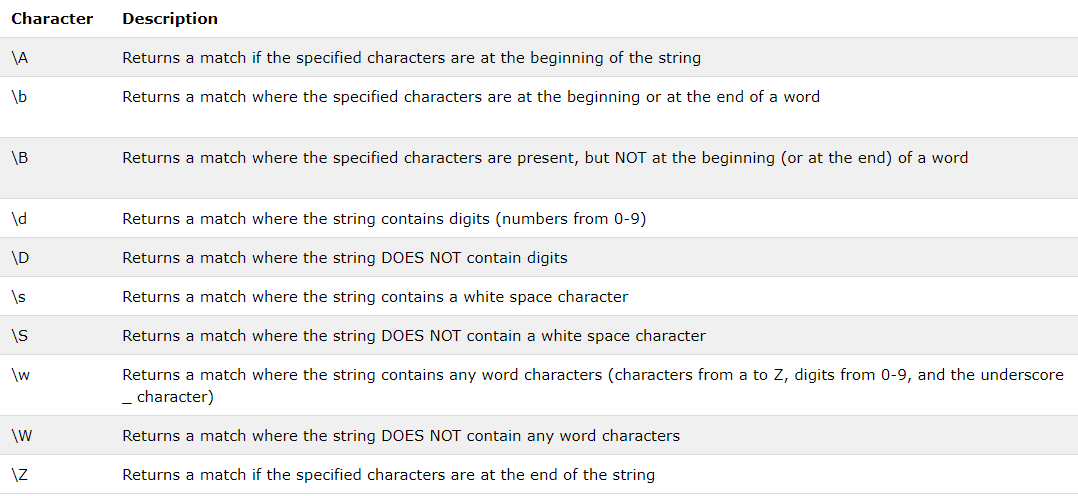

In [61]:
text = re.sub('\W', ' ', text).lower()
text

'wikipedia is a multilingual online encyclopedia with exclusively free content and no ads  based on open collaboration through a model of content editing using web based applications such as web browsers  called wiki  it is the largest and most popular general reference work on the world wide web  and is one of the most popular websites by alexa rank as of april 2019  it is owned and supported by the wikimedia foundation  a non profit organization that operates on money it receives from donors to remain ad free '

## Tokenize The Words

In [62]:
words = word_tokenize(text)
print(words)

['wikipedia', 'is', 'a', 'multilingual', 'online', 'encyclopedia', 'with', 'exclusively', 'free', 'content', 'and', 'no', 'ads', 'based', 'on', 'open', 'collaboration', 'through', 'a', 'model', 'of', 'content', 'editing', 'using', 'web', 'based', 'applications', 'such', 'as', 'web', 'browsers', 'called', 'wiki', 'it', 'is', 'the', 'largest', 'and', 'most', 'popular', 'general', 'reference', 'work', 'on', 'the', 'world', 'wide', 'web', 'and', 'is', 'one', 'of', 'the', 'most', 'popular', 'websites', 'by', 'alexa', 'rank', 'as', 'of', 'april', '2019', 'it', 'is', 'owned', 'and', 'supported', 'by', 'the', 'wikimedia', 'foundation', 'a', 'non', 'profit', 'organization', 'that', 'operates', 'on', 'money', 'it', 'receives', 'from', 'donors', 'to', 'remain', 'ad', 'free']


## Remove Stopwords
We need to remove the stopwords by using list comprehension. 

In [63]:
words = [word for word in words if word not in stopwords.words("English")]
print(words)

['wikipedia', 'multilingual', 'online', 'encyclopedia', 'exclusively', 'free', 'content', 'ads', 'based', 'open', 'collaboration', 'model', 'content', 'editing', 'using', 'web', 'based', 'applications', 'web', 'browsers', 'called', 'wiki', 'largest', 'popular', 'general', 'reference', 'work', 'world', 'wide', 'web', 'one', 'popular', 'websites', 'alexa', 'rank', 'april', '2019', 'owned', 'supported', 'wikimedia', 'foundation', 'non', 'profit', 'organization', 'operates', 'money', 'receives', 'donors', 'remain', 'ad', 'free']


# Tag Parts of Speech
This is a simple way of tagging words grammatically with their proper part of speech. Other more advanced techniques include Hidden Markov Models and Recurrent Neural Networks.

In [64]:
print(pos_tag(words))

[('wikipedia', 'JJ'), ('multilingual', 'JJ'), ('online', 'NN'), ('encyclopedia', 'NN'), ('exclusively', 'RB'), ('free', 'JJ'), ('content', 'NN'), ('ads', 'NNS'), ('based', 'VBN'), ('open', 'JJ'), ('collaboration', 'NN'), ('model', 'NN'), ('content', 'NN'), ('editing', 'VBG'), ('using', 'VBG'), ('web', 'NNS'), ('based', 'VBN'), ('applications', 'NNS'), ('web', 'VBP'), ('browsers', 'NNS'), ('called', 'VBD'), ('wiki', 'RB'), ('largest', 'JJS'), ('popular', 'JJ'), ('general', 'JJ'), ('reference', 'NN'), ('work', 'NN'), ('world', 'NN'), ('wide', 'JJ'), ('web', 'NN'), ('one', 'CD'), ('popular', 'JJ'), ('websites', 'VBZ'), ('alexa', 'JJ'), ('rank', 'NN'), ('april', 'NN'), ('2019', 'CD'), ('owned', 'VBD'), ('supported', 'VBN'), ('wikimedia', 'JJ'), ('foundation', 'NN'), ('non', 'NN'), ('profit', 'NN'), ('organization', 'NN'), ('operates', 'VBZ'), ('money', 'NN'), ('receives', 'VBZ'), ('donors', 'NNS'), ('remain', 'VBP'), ('ad', 'NN'), ('free', 'JJ')]


# Return the Nested NLTK Tree
Note that running the code will return a lookup error: 

* NLTK was unable to find the gs file!
* Use software specific configuration paramaters or set the PATH environment variable.

This is because the interpreter for the PostScript language and for PDF needs to be installed.
To install the open source version of the software go to https://www.ghostscript.com/download/gsdnld.html

After following the installation instructions provided by ghostscropt.com, the path of the installation needs to be added to PATH. Just use the os packages to do so.

In [65]:
os.environ['PATH'] += os.pathsep + r"C:\Program Files\gs\gs9.27\bin"

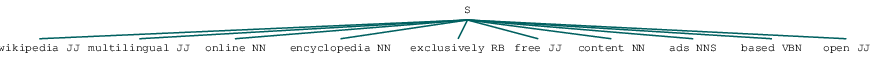

In [66]:
ne_chunk(pos_tag(words)[:10])

# Reducing Words 

## Stemming 

In [67]:
stemmed = [PorterStemmer().stem(word) for word in words]
print(stemmed)

['wikipedia', 'multilingu', 'onlin', 'encyclopedia', 'exclus', 'free', 'content', 'ad', 'base', 'open', 'collabor', 'model', 'content', 'edit', 'use', 'web', 'base', 'applic', 'web', 'browser', 'call', 'wiki', 'largest', 'popular', 'gener', 'refer', 'work', 'world', 'wide', 'web', 'one', 'popular', 'websit', 'alexa', 'rank', 'april', '2019', 'own', 'support', 'wikimedia', 'foundat', 'non', 'profit', 'organ', 'oper', 'money', 'receiv', 'donor', 'remain', 'ad', 'free']


## Lemmatizing

### Simple

In [68]:
lemmed = [WordNetLemmatizer().lemmatize(word) for word in words]
print(lemmed)

['wikipedia', 'multilingual', 'online', 'encyclopedia', 'exclusively', 'free', 'content', 'ad', 'based', 'open', 'collaboration', 'model', 'content', 'editing', 'using', 'web', 'based', 'application', 'web', 'browser', 'called', 'wiki', 'largest', 'popular', 'general', 'reference', 'work', 'world', 'wide', 'web', 'one', 'popular', 'website', 'alexa', 'rank', 'april', '2019', 'owned', 'supported', 'wikimedia', 'foundation', 'non', 'profit', 'organization', 'operates', 'money', 'receives', 'donor', 'remain', 'ad', 'free']


### Verb Conversion

In [69]:
lemmed = [WordNetLemmatizer().lemmatize(word, pos='v') for word in words]
print(lemmed)

['wikipedia', 'multilingual', 'online', 'encyclopedia', 'exclusively', 'free', 'content', 'ads', 'base', 'open', 'collaboration', 'model', 'content', 'edit', 'use', 'web', 'base', 'applications', 'web', 'browsers', 'call', 'wiki', 'largest', 'popular', 'general', 'reference', 'work', 'world', 'wide', 'web', 'one', 'popular', 'websites', 'alexa', 'rank', 'april', '2019', 'own', 'support', 'wikimedia', 'foundation', 'non', 'profit', 'organization', 'operate', 'money', 'receive', 'donors', 'remain', 'ad', 'free']


# Feature Extraction

## Bag of Words: Count Vectorize to Document Term Matrix

In [76]:
vect = CountVectorizer()
X = vect.fit_transform(lemmed)
print(X.toarray())

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
print(vect.vocabulary_)

{'wikipedia': 42, 'multilingual': 21, 'online': 24, 'encyclopedia': 13, 'exclusively': 14, 'free': 16, 'content': 10, 'ads': 2, 'base': 6, 'open': 25, 'collaboration': 9, 'model': 19, 'edit': 12, 'use': 36, 'web': 37, 'applications': 4, 'browsers': 7, 'call': 8, 'wiki': 40, 'largest': 18, 'popular': 29, 'general': 17, 'reference': 33, 'work': 43, 'world': 44, 'wide': 39, 'one': 23, 'websites': 38, 'alexa': 3, 'rank': 31, 'april': 5, '2019': 0, 'own': 28, 'support': 35, 'wikimedia': 41, 'foundation': 15, 'non': 22, 'profit': 30, 'organization': 27, 'operate': 26, 'money': 20, 'receive': 32, 'donors': 11, 'remain': 34, 'ad': 1}


## Term Frequency Inverse Dcoument Frequency

### Converting Bag of Words to TFIDF

In [81]:
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)

tfidf.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Vectorize Using TFIDF

In [83]:
vect = TfidfVectorizer()
X = vect.fit_transform(lemmed)
X.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
print(vect.vocabulary_)

{'wikipedia': 42, 'multilingual': 21, 'online': 24, 'encyclopedia': 13, 'exclusively': 14, 'free': 16, 'content': 10, 'ads': 2, 'base': 6, 'open': 25, 'collaboration': 9, 'model': 19, 'edit': 12, 'use': 36, 'web': 37, 'applications': 4, 'browsers': 7, 'call': 8, 'wiki': 40, 'largest': 18, 'popular': 29, 'general': 17, 'reference': 33, 'work': 43, 'world': 44, 'wide': 39, 'one': 23, 'websites': 38, 'alexa': 3, 'rank': 31, 'april': 5, '2019': 0, 'own': 28, 'support': 35, 'wikimedia': 41, 'foundation': 15, 'non': 22, 'profit': 30, 'organization': 27, 'operate': 26, 'money': 20, 'receive': 32, 'donors': 11, 'remain': 34, 'ad': 1}
